<a href="https://colab.research.google.com/github/eugeniaring/machine-learning-course-eugenia/blob/main/3_analisi_geo_ifoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install geopandas

## ripasso di Pandas

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('ARIA_2021.xlsx',sheet_name='Tav.7.1 - aria',header=8,skipfooter=18)
df.tail()

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Unnamed: 0 Unnamed: 1 Unnamed: 2  Unnamed: 3  Unnamed: 4
105    Sassari          0          0         NaN         NaN
106      Nuoro          0          0         NaN         NaN
107   Oristano          0          0         NaN         NaN
108   Cagliari  13.333333   7.142857         NaN         NaN
109   Carbonia          0          0         NaN         NaN

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df.drop(['Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

Unnamed: 0 Unnamed: 1 Unnamed: 2
0     Torino  66.666667  66.666667
1   Vercelli  44.444444  33.333333
2     Novara       37.5         25
3     Biella       12.5       12.5
4      Cuneo         20         40

In [ ]:
df.columns = ['citta','aria_indice_2020','aria_indice_2021']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

citta aria_indice_2020 aria_indice_2021
0    Torino        66.666667        66.666667
1  Vercelli        44.444444        33.333333
2    Novara             37.5               25
3    Biella             12.5             12.5
4     Cuneo               20               40

In [ ]:

df.tail()

citta aria_indice_2020 aria_indice_2021
105   Sassari                0                0
106     Nuoro                0                0
107  Oristano                0                0
108  Cagliari        13.333333         7.142857
109  Carbonia                0                0

## Geopandas

In [ ]:
import geopandas as gpd

In [ ]:
df_geo = gpd.read_file('Com01012023_WGS84.shp')

In [ ]:
df_geo.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


COD_RIP  COD_REG  COD_PROV  COD_CM  COD_UTS  PRO_COM PRO_COM_T  \
0        1        1         1     201      201     1077    001077   
1        1        1         1     201      201     1079    001079   
2        1        1         1     201      201     1089    001089   

        COMUNE COMUNE_A  CC_UTS    SHAPE_LENG    Shape_Le_1  \
0   Chiaverano     None       0  18164.369945  18164.236621   
1  Chiesanuova     None       0  10777.398475  10777.318814   
2       Coazze     None       0  41591.434852  41591.122092   

                                            geometry  
0  POLYGON ((414358.390 5042001.044, 414381.796 5...  
1  POLYGON ((394621.039 5031581.116, 394716.100 5...  
2  POLYGON ((364914.897 4993224.894, 364929.991 4...

In [ ]:
df_geo[df_geo.COMUNE=='Milano']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


COD_RIP  COD_REG  COD_PROV  COD_CM  COD_UTS  PRO_COM PRO_COM_T  COMUNE  \
604        1        3        15     215      215    15146    015146  Milano   

    COMUNE_A  CC_UTS     SHAPE_LENG   Shape_Le_1  \
604     None       1  105344.973885  105344.1896   

                                              geometry  
604  POLYGON ((513714.538 5042508.056, 513719.683 5...

In [ ]:
df_geo[df_geo.COMUNE=='Bologna']

COD_RIP  COD_REG  COD_PROV  COD_CM  COD_UTS  PRO_COM PRO_COM_T   COMUNE  \
4998        2        8        37     237      237    37006    037006  Bologna   

     COMUNE_A  CC_UTS    SHAPE_LENG    Shape_Le_1  \
4998     None       1  81613.816075  81613.184973   

                                               geometry  
4998  POLYGON ((688291.753 4935882.627, 688295.250 4...

In [ ]:
df_geo.loc[df_geo.COMUNE.isin(['Roma','Torino']),['COMUNE','geometry']]

COMUNE                                           geometry
6449  Torino  MULTIPOLYGON (((395025.418 4999380.357, 395040...
7892    Roma  MULTIPOLYGON (((770434.487 4625676.636, 770419...

In [ ]:
df_geo.COMUNE.nunique(),len(df_geo)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7896, 7901)

In [ ]:
df_geo.duplicated(subset=['COMUNE']).sum()

5

In [ ]:
df_geo.loc[df_geo.COMUNE.str.startswith('A'),'COMUNE']

3             Almese
4            Alpette
9          Alpignano
10          Andezeno
26          Angrogna
            ...     
7811          Austis
7827    Aidomaggiore
7834            Ales
7839         Arborea
7853          Assolo
Name: COMUNE, Length: 438, dtype: object

In [ ]:
df_geo.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7901, 13)

In [ ]:
df_geo.describe()

COD_RIP      COD_REG     COD_PROV       COD_CM      COD_UTS  \
count  7901.000000  7901.000000  7901.000000  7901.000000  7901.000000   
mean      2.486774     8.661942    45.164030    38.930768    77.261233   
std       1.428989     6.389648    32.659148    90.052436    79.313551   
min       1.000000     1.000000     1.000000     0.000000     2.000000   
25%       1.000000     3.000000    16.000000     0.000000    19.000000   
50%       2.000000     7.000000    40.000000     0.000000    57.000000   
75%       4.000000    15.000000    73.000000     0.000000    94.000000   
max       5.000000    20.000000   111.000000   292.000000   292.000000   

             PRO_COM       CC_UTS     SHAPE_LENG     Shape_Le_1  
count    7901.000000  7901.000000    7901.000000    7901.000000  
mean    45227.043918     0.013922   32461.007108   32485.602251  
std     32637.078731     0.117176   21714.137251   21668.208873  
min      1001.000000     0.000000       0.000000    1566.289523  
25%     16148.000000     0.000000   18857.749926   18897.506636  
50%     40037.000000     0.000000   27028.221223   27058.854827  
75%     73006.000000     0.000000   39614.867270   39645.314343  
max    111107.000000     1.000000  332527.088819  332693.304311

In [ ]:
type(df_geo)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


geopandas.geodataframe.GeoDataFrame

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   citta             110 non-null    object
 1   aria_indice_2020  109 non-null    object
 2   aria_indice_2021  107 non-null    object
dtypes: object(3)
memory usage: 2.7+ KB


In [ ]:
df_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7901 entries, 0 to 7900
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   COD_RIP     7901 non-null   int64   
 1   COD_REG     7901 non-null   int64   
 2   COD_PROV    7901 non-null   int64   
 3   COD_CM      7901 non-null   int64   
 4   COD_UTS     7901 non-null   int64   
 5   PRO_COM     7901 non-null   int64   
 6   PRO_COM_T   7901 non-null   object  
 7   COMUNE      7901 non-null   object  
 8   COMUNE_A    124 non-null    object  
 9   CC_UTS      7901 non-null   int64   
 10  SHAPE_LENG  7901 non-null   float64 
 11  Shape_Le_1  7901 non-null   float64 
 12  geometry    7901 non-null   geometry
dtypes: float64(2), geometry(1), int64(7), object(3)
memory usage: 802.6+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_geo.crs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
df.head()

citta aria_indice_2020 aria_indice_2021
0    Torino        66.666667        66.666667
1  Vercelli        44.444444        33.333333
2    Novara             37.5               25
3    Biella             12.5             12.5
4     Cuneo               20               40

In [ ]:
df_geo.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


COD_RIP  COD_REG  COD_PROV  COD_CM  COD_UTS  PRO_COM PRO_COM_T  \
0        1        1         1     201      201     1077    001077   
1        1        1         1     201      201     1079    001079   
2        1        1         1     201      201     1089    001089   

        COMUNE COMUNE_A  CC_UTS    SHAPE_LENG    Shape_Le_1  \
0   Chiaverano     None       0  18164.369945  18164.236621   
1  Chiesanuova     None       0  10777.398475  10777.318814   
2       Coazze     None       0  41591.434852  41591.122092   

                                            geometry  
0  POLYGON ((414358.390 5042001.044, 414381.796 5...  
1  POLYGON ((394621.039 5031581.116, 394716.100 5...  
2  POLYGON ((364914.897 4993224.894, 364929.991 4...

In [ ]:
df_geo.rename(columns={'COMUNE':'citta'},inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_geo.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['COD_RIP', 'COD_REG', 'COD_PROV', 'COD_CM', 'COD_UTS', 'PRO_COM',
       'PRO_COM_T', 'citta', 'COMUNE_A', 'CC_UTS', 'SHAPE_LENG', 'Shape_Le_1',
       'geometry'],
      dtype='object')

In [ ]:
len(df_geo)

7901

In [ ]:
df_geo = df_geo.merge(df,how='inner',on='citta')

In [ ]:
len(df_geo)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


108

In [ ]:
df_geo.head(3)

COD_RIP  COD_REG  COD_PROV  COD_CM  COD_UTS  PRO_COM PRO_COM_T     citta  \
0        1        1         2       0        2     2158    002158  Vercelli   
1        4       15        64       0       64    64008    064008  Avellino   
2        3        9        45       0       45    45010    045010     Massa   

  COMUNE_A  CC_UTS    SHAPE_LENG    Shape_Le_1  \
0     None       1  63302.866908  63302.389623   
1     None       1  30742.953773  30742.685812   
2     None       1  54175.436712  54175.013715   

                                            geometry aria_indice_2020  \
0  POLYGON ((453592.603 5024411.180, 453631.602 5...        44.444444   
1  POLYGON ((990960.431 4548871.198, 990964.619 4...        33.333333   
2  POLYGON ((595541.105 4885892.230, 595671.104 4...               25   

  aria_indice_2021  
0        33.333333  
1               50  
2               25

In [ ]:
df_geo = df_geo[['citta','geometry','aria_indice_2020','aria_indice_2021']]
df_geo.head(3)

citta                                           geometry  \
0  Vercelli  POLYGON ((453592.603 5024411.180, 453631.602 5...   
1  Avellino  POLYGON ((990960.431 4548871.198, 990964.619 4...   
2     Massa  POLYGON ((595541.105 4885892.230, 595671.104 4...   

  aria_indice_2020 aria_indice_2021  
0        44.444444        33.333333  
1        33.333333               50  
2               25               25

In [ ]:
df_geo.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


citta               0
geometry            0
aria_indice_2020    1
aria_indice_2021    3
dtype: int64

In [ ]:
df_geo.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_geo.isnull().sum()

citta               0
geometry            0
aria_indice_2020    0
aria_indice_2021    0
dtype: int64

In [ ]:
df_geo.aria_indice_2021.values

array([33.33333333333333, 50, 25, 58.82352941176471, 40, '….',
       34.78260869565217, 20, 9.090909090909092, 15.384615384615385, 60,
       50, 12.5, 25, 0, 18.181818181818183, 58.333333333333336, 50,
       46.666666666666664, 20, 55.55555555555556, 0, 0, 0, 20, 0, 0, 0, 0,
       50, '….', 0, 0, '….', 16.666666666666664, 20, 60,
       33.33333333333333, 20, 20, 50, 0, 46.15384615384615, 0, 12.5, 0,
       25, 50, 50, 33.33333333333333, 7.142857142857142,
       44.44444444444444, 3.7037037037037033, 42.857142857142854, 6.25,
       38.46153846153847, 50, 3.8461538461538463, 0, 25, 12.5, 50,
       53.84615384615385, 58.333333333333336, 44.44444444444444,
       47.05882352941176, 7.142857142857142, 0, 0, 22.22222222222222, 20,
       23.076923076923077, 12.5, 9.523809523809524, 25, 12.5, 10, 20, 20,
       '….', 66.66666666666666, 30, '….', 0, 25, 37.5, 0, 0, 0,
       66.66666666666666, 55.55555555555556, 0, 0, 0, 0, 20, 0,
       14.285714285714285, 11.11111111111111, '….', 12.

In [ ]:
df_geo = df_geo[df_geo.aria_indice_2021!='….']

In [ ]:
df_geo.sort_values(by='aria_indice_2021',ascending=False).head()

citta                                           geometry  \
90   Monza  POLYGON ((523152.746 5053221.182, 523188.492 5...   
81  Torino  MULTIPOLYGON (((395025.418 4999380.357, 395040...   
36    Como  POLYGON ((503098.610 5076479.299, 503147.593 5...   
10  Padova  POLYGON ((723770.214 5037277.539, 723863.214 5...   
3   Milano  POLYGON ((513714.538 5042508.056, 513719.683 5...   

   aria_indice_2020 aria_indice_2021  
90        66.666667        66.666667  
81        66.666667        66.666667  
36               60               60  
10               60               60  
3         58.823529        58.823529

In [ ]:
df_geo.sort_values(by='aria_indice_2020',ascending=False).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


citta                                           geometry  \
90    Monza  POLYGON ((523152.746 5053221.182, 523188.492 5...   
81   Torino  MULTIPOLYGON (((395025.418 4999380.357, 395040...   
86   Rimini  POLYGON ((780802.607 4890261.363, 780819.355 4...   
63  Vicenza  POLYGON ((699685.381 5053767.415, 699718.914 5...   
10   Padova  POLYGON ((723770.214 5037277.539, 723863.214 5...   

   aria_indice_2020 aria_indice_2021  
90        66.666667        66.666667  
81        66.666667        66.666667  
86             62.5             37.5  
63        61.538462        53.846154  
10               60               60

In [ ]:
! pip install mapclassify

<Axes: >

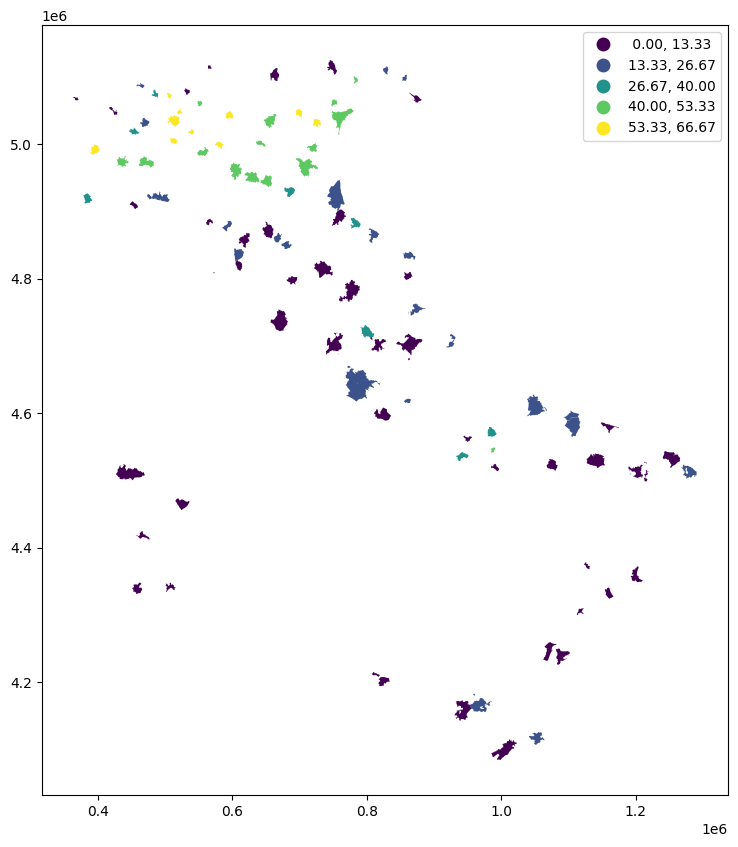

In [ ]:
df_geo.plot(figsize=(10,10),column='aria_indice_2021',legend=True,scheme='equal_interval')

In [ ]:
! pip install contextily

### centroids

In [ ]:
df_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 99 entries, 0 to 107
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   citta             99 non-null     object  
 1   geometry          99 non-null     geometry
 2   aria_indice_2020  99 non-null     object  
 3   aria_indice_2021  99 non-null     object  
dtypes: geometry(1), object(3)
memory usage: 3.9+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_geo['centroid'] = df_geo.centroid

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_geo[['centroid','geometry']]

centroid  \
0    POINT (453868.627 5018643.858)   
1    POINT (987545.966 4545352.268)   
2    POINT (593027.429 4878628.629)   
3    POINT (513517.702 5035004.645)   
4    POINT (384782.266 4919134.925)   
..                              ...   
103  POINT (532822.915 5078312.919)   
104  POINT (507626.979 4341711.993)   
105  POINT (458886.938 4339260.520)   
106  POINT (787156.303 4642859.368)   
107  POINT (822407.672 4203737.863)   

                                              geometry  
0    POLYGON ((453592.603 5024411.180, 453631.602 5...  
1    POLYGON ((990960.431 4548871.198, 990964.619 4...  
2    POLYGON ((595541.105 4885892.230, 595671.104 4...  
3    POLYGON ((513714.538 5042508.056, 513719.683 5...  
4    POLYGON ((384783.052 4927093.341, 384780.866 4...  
..                                                 ...  
103  POLYGON ((531034.402 5083377.327, 531126.302 5...  
104  POLYGON ((508216.825 4348167.821, 508229.224 4...  
105  POLYGON ((461403.791 4347922.874, 461454.790 4...  
106  MULTIPOLYGON (((770434.487 4625676.636, 770419...  
107  MULTIPOLYGON (((823256.854 4207706.127, 823282...  

[99 rows x 2 columns]

In [ ]:
df_geo = df_geo.set_geometry('centroid')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_geo2 = df_geo.to_crs('3857')

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen 

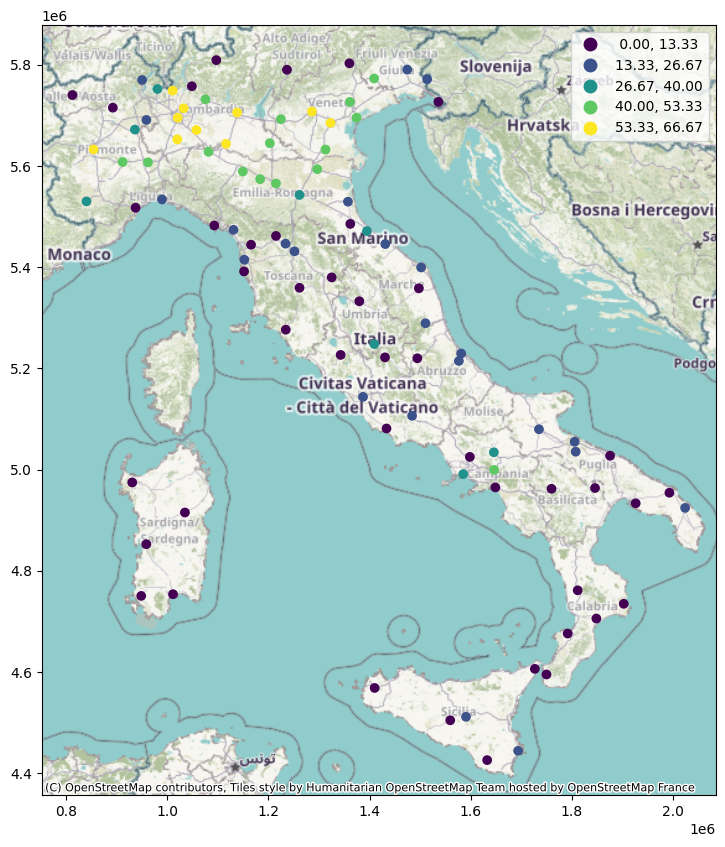

In [ ]:
ax = df_geo2.plot(figsize=(10,10),column='aria_indice_2021',legend=True,scheme='equal_interval')
cx.add_basemap(ax,crs=df_geo2.crs.to_string())

In [ ]:
import contextily as cx

In [ ]:
df_geo2 = df_geo.to_crs('3857')

In [ ]:
df_geo2.crs.to_string()

'EPSG:3857'

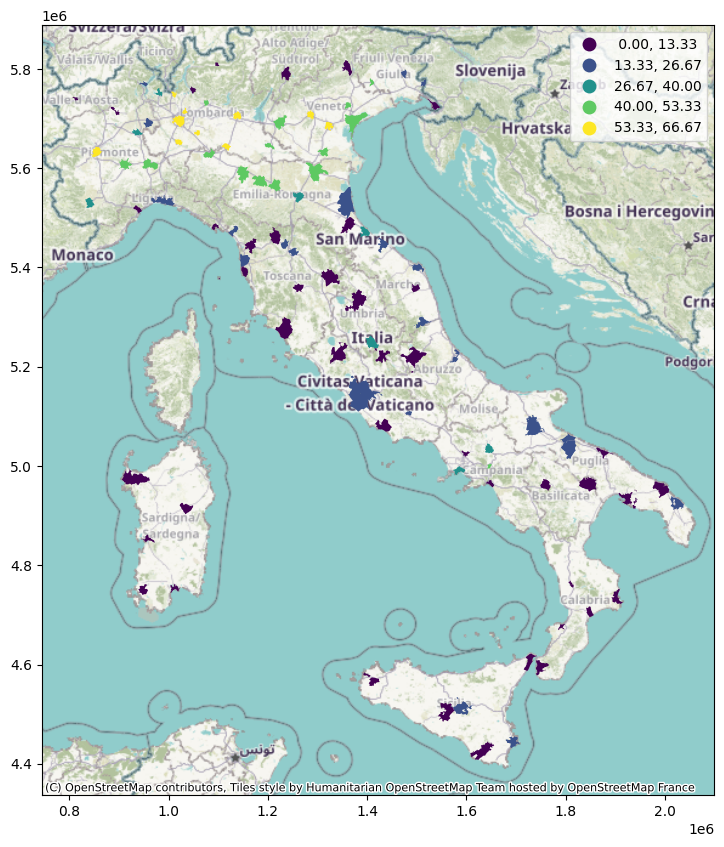

In [ ]:
ax = df_geo2.plot(figsize=(10,10),column='aria_indice_2021',legend=True,scheme='equal_interval')
cx.add_basemap(ax,crs=df_geo2.crs.to_string())

In [ ]:
df_geo.sort_values(by='aria_indice_2021',ascending=False).head().citta.values

array(['Monza', 'Torino', 'Como', 'Padova', 'Milano'], dtype=object)

In [ ]:
df_geo3 = df_geo2[df_geo.citta.isin(['Monza', 'Torino', 'Como', 'Padova', 'Milano','Roma'])]

/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  self.bins = quantile(y, k=k)


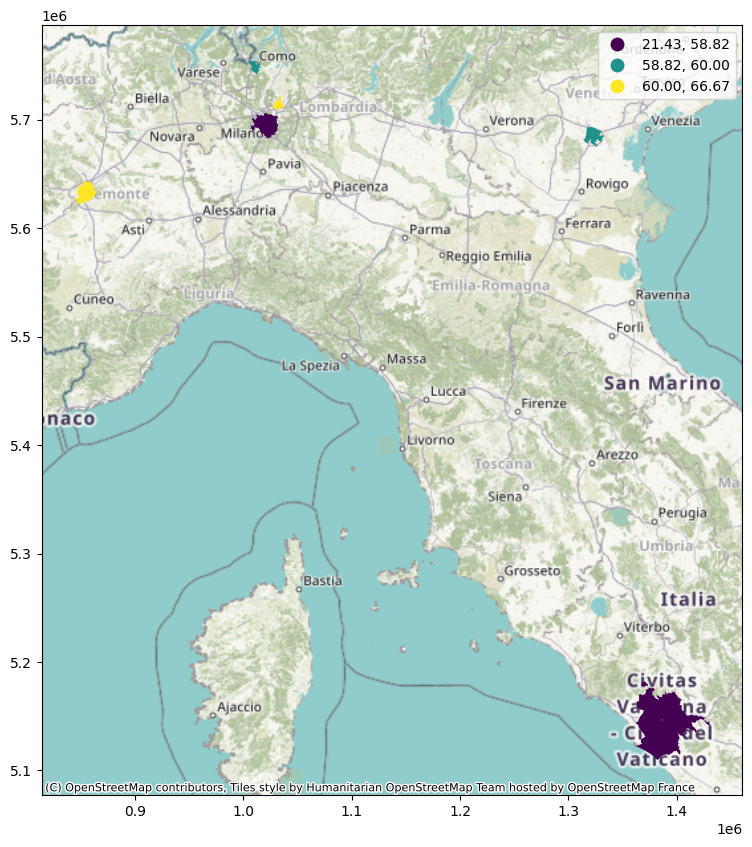

In [ ]:
ax = df_geo3.plot(figsize=(10,10),column='aria_indice_2021',legend=True,scheme='quantiles')
cx.add_basemap(ax,crs=df_geo3.crs.to_string())

In [ ]:
df_geo2 = df_geo.to_crs('3857')

In [ ]:
df_geo2.isnull().sum()

citta               0
geometry            0
aria_indice_2020    1
aria_indice_2021    3
dtype: int64

In [ ]:
#df_geo2.explore(column='aria_indice_2021')

## openstreetmap

In [ ]:
! pip install osmnx

In [ ]:
import osmnx as ox

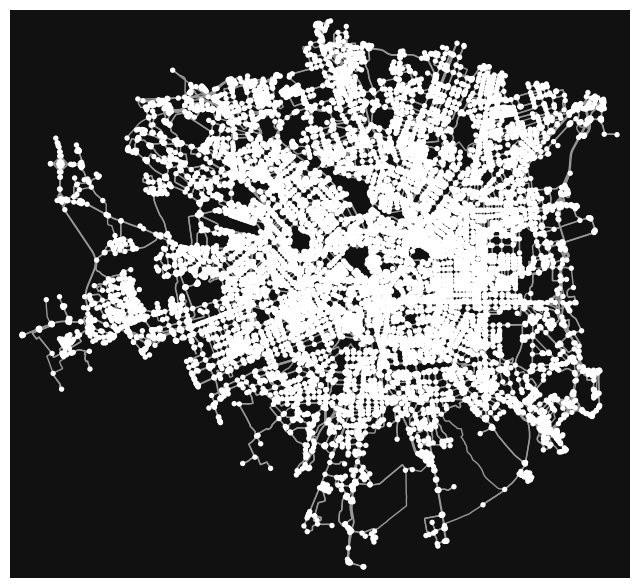

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_place('Milano, Italy',network_type='drive')
ox.plot_graph(G)

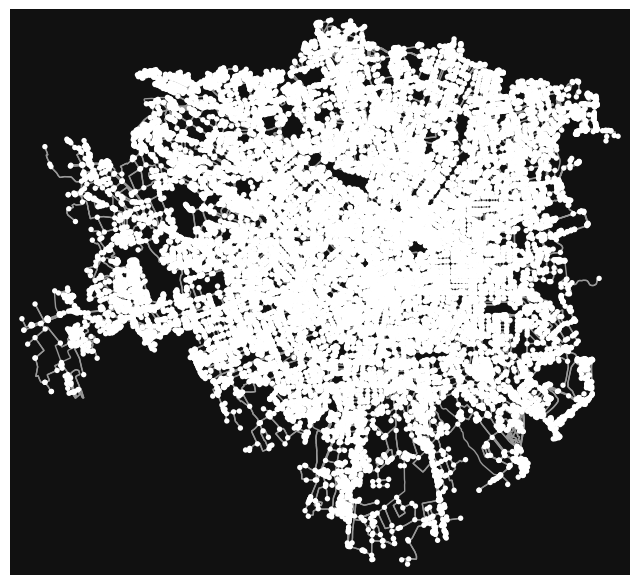

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_place('Milano, Italy',network_type='bike')
ox.plot_graph(G)

In [ ]:
G = ox.graph_from_place('Milano, Italy',network_type='drive')

In [ ]:
area, edges = ox.graph_to_gdfs(G)

In [ ]:
area.highway.value_counts()

traffic_signals      1012
crossing              209
turning_circle         57
motorway_junction      45
turning_loop            6
mini_roundabout         4
give_way                3
Name: highway, dtype: int64

In [ ]:
area.head()

y         x  street_count          highway  ref  \
osmid                                                               
10371529  45.487563  9.076625             3              NaN  NaN   
10371530  45.479813  9.102055             3              NaN  NaN   
13595397  45.499527  9.130661             4  traffic_signals  NaN   
13598756  45.482757  9.163773             4              NaN  NaN   
13598788  45.487319  9.157376             3              NaN  NaN   

                          geometry  
osmid                               
10371529  POINT (9.07662 45.48756)  
10371530  POINT (9.10205 45.47981)  
13595397  POINT (9.13066 45.49953)  
13598756  POINT (9.16377 45.48276)  
13598788  POINT (9.15738 45.48732)

In [ ]:
edges.head()

osmid  oneway lanes           name  \
u        v          key                                                        
10371529 743371634  0                 274433644    True     2     Via Novara   
         743371622  0                  26703159    True   NaN     Via Novara   
10371530 2754579083 0    [270390234, 270390223]    True     2     Via Novara   
13595397 271096577  0                 195654896   False     2  Viale Certosa   
         344814479  0                 195654901    True   NaN  Viale Certosa   

                           highway reversed   length  \
u        v          key                                
10371529 743371634  0      primary    False  154.435   
         743371622  0     tertiary    False  150.466   
10371530 2754579083 0      primary    False  385.421   
13595397 271096577  0    secondary    False   41.593   
         344814479  0    secondary    False   16.212   

                                                                  geometry  \
u        v          key                                                      
10371529 743371634  0      LINESTRING (9.07662 45.48756, 9.07469 45.48785)   
         743371622  0    LINESTRING (9.07662 45.48756, 9.07611 45.48771...   
10371530 2754579083 0    LINESTRING (9.10205 45.47981, 9.10170 45.47991...   
13595397 271096577  0      LINESTRING (9.13066 45.49953, 9.13021 45.49973)   
         344814479  0      LINESTRING (9.13066 45.49953, 9.13066 45.49967)   

                        maxspeed junction  ref bridge tunnel access width  \
u        v          key                                                     
10371529 743371634  0        NaN      NaN  NaN    NaN    NaN    NaN   NaN   
         743371622  0        NaN      NaN  NaN    NaN    NaN    NaN   NaN   
10371530 2754579083 0         70      NaN  NaN    NaN    NaN    NaN   NaN   
13595397 271096577  0         50      NaN  NaN    NaN    NaN    NaN   NaN   
         344814479  0        NaN      NaN  NaN    NaN    NaN    NaN   NaN   

                        est_width  
u        v          key            
10371529 743371634  0         NaN  
         743371622  0         NaN  
10371530 2754579083 0         NaN  
13595397 271096577  0         NaN  
         344814479  0         NaN

In [ ]:
workships = ox.geometries_from_place('Milano, Italy',{'amenity':'place_of_worship'})

<ipython-input-40-535aa642c54a>:1: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  workships = ox.geometries_from_place('Milano, Italy',{'amenity':'place_of_worship'})


In [ ]:
workships.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['amenity', 'name', 'religion', 'geometry', 'created_by', 'addr:city',
       'addr:country', 'addr:housenumber', 'addr:postcode', 'addr:street',
       'denomination', 'email', 'fixme', 'website', 'wheelchair',
       'description', 'name:en', 'wikidata', 'wikimedia_commons', 'wikipedia',
       'historic', 'level', 'service_times', 'phone', 'check_date',
       'comment:it', 'building', 'access', 'air_conditioning', 'baby_feeding',
       'internet_access', 'nodes', 'start_date', 'tourism', 'name:es',
       'name:it', 'name:lmo', 'name:ru', 'roof:colour', 'roof:shape',
       'alt_name', 'building:architecture', 'url', 'alt_official_name',
       'architect', 'building:levels', 'building:material', 'height',
       'inscription', 'name:cs', 'name:de', 'name:fr', 'name:hi', 'name:nl',
       'name:pl', 'name:pt', 'name:zh', 'official_name', 'opening_hours',
       'toilets:wheelchair', 'wheelchair:description:de',
       'wheelchair:description:en', 'wheelchair:description:it',

In [ ]:
workships = workships[['amenity','name','religion','geometry','building','architect','start_date']]

In [ ]:
workships.isnull().sum()

amenity         0
name           37
religion        1
geometry        0
building       46
architect     313
start_date    261
dtype: int64

In [ ]:
workships.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


amenity             name   religion  \
element_type osmid                                                     
node         21226564   place_of_worship  Joseph Tehillot     jewish   
             29829118   place_of_worship              NaN     jewish   
             249599280  place_of_worship             Noam     jewish   
             251291614  place_of_worship      Beth Shlomo     jewish   
             252641134  place_of_worship              NaN  christian   

                                        geometry building architect start_date  
element_type osmid                                                              
node         21226564   POINT (9.15027 45.46360)      NaN       NaN        NaN  
             29829118   POINT (9.13800 45.45576)      NaN       NaN        NaN  
             249599280  POINT (9.13358 45.45939)      NaN       NaN        NaN  
             251291614  POINT (9.20446 45.45045)      NaN       NaN        NaN  
             252641134  POINT (9.18273 45.47884)      NaN       NaN        NaN

In [ ]:
workships.religion.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


christian        304
jewish            10
muslim             3
buddhist           2
shinto             1
scientologist      1
Name: religion, dtype: int64

In [ ]:
workships[workships.religion=='jewish']

amenity                name religion  \
element_type osmid                                                       
node         21226564    place_of_worship     Joseph Tehillot   jewish   
             29829118    place_of_worship                 NaN   jewish   
             249599280   place_of_worship                Noam   jewish   
             251291614   place_of_worship         Beth Shlomo   jewish   
             254110250   place_of_worship                 NaN   jewish   
             311789884   place_of_worship                 NaN   jewish   
             729314069   place_of_worship          Bet Talmud   jewish   
             1006057363  place_of_worship          Bet haLevi   jewish   
             2951374596  place_of_worship  bet Yoshef veEliau   jewish   
way          204720649   place_of_worship  Tempio Israelitico   jewish   

                                                                  geometry  \
element_type osmid                                                           
node         21226564                             POINT (9.15027 45.46360)   
             29829118                             POINT (9.13800 45.45576)   
             249599280                            POINT (9.13358 45.45939)   
             251291614                            POINT (9.20446 45.45045)   
             254110250                            POINT (9.15667 45.45516)   
             311789884                            POINT (9.20166 45.48021)   
             729314069                            POINT (9.14089 45.45593)   
             1006057363                           POINT (9.14451 45.45700)   
             2951374596                           POINT (9.16707 45.47657)   
way          204720649   POLYGON ((9.19878 45.46012, 9.19884 45.46012, ...   

                          building architect start_date  
element_type osmid                                       
node         21226564          NaN       NaN        NaN  
             29829118          NaN       NaN        NaN  
             249599280         NaN       NaN        NaN  
             251291614         NaN       NaN        NaN  
             254110250         NaN       NaN        NaN  
             311789884         NaN       NaN        NaN  
             729314069         NaN       NaN        NaN  
             1006057363        NaN       NaN        NaN  
             2951374596        NaN       NaN        NaN  
way          204720649   synagogue       NaN       1892

In [ ]:
cinemas = ox.geometries_from_place('Milano, Italy',{'tourism':'hotel'})
cinemas.head()

<ipython-input-14-ee42c9449dc4>:1: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  cinemas = ox.geometries_from_place('Milano, Italy',{'tourism':'hotel'})


geometry addr:city addr:country  \
element_type osmid                                                        
node         256205289  POINT (9.14772 45.49206)    Milano           IT   
             258076950  POINT (9.16190 45.49057)    Milano          NaN   
             259590878  POINT (9.14402 45.47254)    Milano          NaN   
             268567601  POINT (9.19224 45.46596)    Milano           IT   
             272871166  POINT (9.15875 45.46621)    Milano          NaN   

                       addr:housenumber addr:postcode            addr:street  \
element_type osmid                                                             
node         256205289               68         20155          Viale Certosa   
             258076950              45a         20155          Via Mac Mahon   
             259590878                9         20149          Viale Murillo   
             268567601                6         20121      Via Ulrico Hoepli   
             272871166                6         20144  Via Domenico Cimarosa   

                                               email            fax  \
element_type osmid                                                    
node         256205289    info@hotelmorfeomilano.com  +390233103878   
             258076950                           NaN            NaN   
             259590878                           NaN            NaN   
             268567601  sinadelaville@sinahotels.com  +39 02 866609   
             272871166                           NaN            NaN   

                                              name           phone  ...  \
element_type osmid                                                  ...   
node         256205289         Hotel Morfeo Milano   +390239211122  ...   
             258076950        Hotel Boutique Duomo             NaN  ...   
             259590878  Best Western Hotel Astoria             NaN  ...   
             268567601            Sina de la Ville  +39 02 8791311  ...   
             272871166               Hotel Capitol             NaN  ...   

                       building building:levels roof:levels roof:shape  \
element_type osmid                                                       
node         256205289      NaN             NaN         NaN        NaN   
             258076950      NaN             NaN         NaN        NaN   
             259590878      NaN             NaN         NaN        NaN   
             268567601      NaN             NaN         NaN        NaN   
             272871166      NaN             NaN         NaN        NaN   

                       name:zh disused:railway official_name roof:colour  \
element_type osmid                                                         
node         256205289     NaN             NaN           NaN         NaN   
             258076950     NaN             NaN           NaN         NaN   
             259590878     NaN             NaN           NaN         NaN   
             268567601     NaN             NaN           NaN         NaN   
             272871166     NaN             NaN           NaN         NaN   

                       building:part height  
element_type osmid                           
node         256205289           NaN    NaN  
             258076950           NaN    NaN  
             259590878           NaN    NaN  
             268567601           NaN    NaN  
             272871166           NaN    NaN  

[5 rows x 76 columns]

In [ ]:
type(cinemas)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


geopandas.geodataframe.GeoDataFrame

In [ ]:
cinemas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 437 entries, ('node', 256205289) to ('way', 1032608893)
Data columns (total 76 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   geometry                437 non-null    geometry
 1   addr:city               382 non-null    object  
 2   addr:country            150 non-null    object  
 3   addr:housenumber        386 non-null    object  
 4   addr:postcode           386 non-null    object  
 5   addr:street             386 non-null    object  
 6   email                   194 non-null    object  
 7   fax                     101 non-null    object  
 8   name                    435 non-null    object  
 9   phone                   320 non-null    object  
 10  rooms                   411 non-null    object  
 11  stars                   431 non-null    object  
 12  tourism                 437 non-null    object  
 13  website                 391 non-null  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cinemas[cinemas.name=='Starhotels Rosa Grand Hotel']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


geometry addr:city addr:country  \
element_type osmid                                                         
node         1828995190  POINT (9.19402 45.46388)    Milano           IT   

                        addr:housenumber addr:postcode     addr:street  \
element_type osmid                                                       
node         1828995190                3         20122  Piazza Fontana   

                                         email             fax  \
element_type osmid                                               
node         1828995190  rosa.mi@starhotels.it  +39 02 8057964   

                                                name         phone  ...  \
element_type osmid                                                  ...   
node         1828995190  Starhotels Rosa Grand Hotel  +39 02 88311  ...   

                        building building:levels roof:levels roof:shape  \
element_type osmid                                                        
node         1828995190      NaN             NaN         NaN        NaN   

                        name:zh disused:railway official_name roof:colour  \
element_type osmid                                                          
node         1828995190     NaN             NaN           NaN         NaN   

                        building:part height  
element_type osmid                            
node         1828995190           NaN    NaN  

[1 rows x 76 columns]

In [ ]:
! pip install contextily

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import contextily as cx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

In [ ]:
area2 = area.to_crs('3857')
edges2 = edges.to_crs('3857')
cinemas2= cinemas.to_crs('3857')
workships2 = workships.to_crs('3857')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


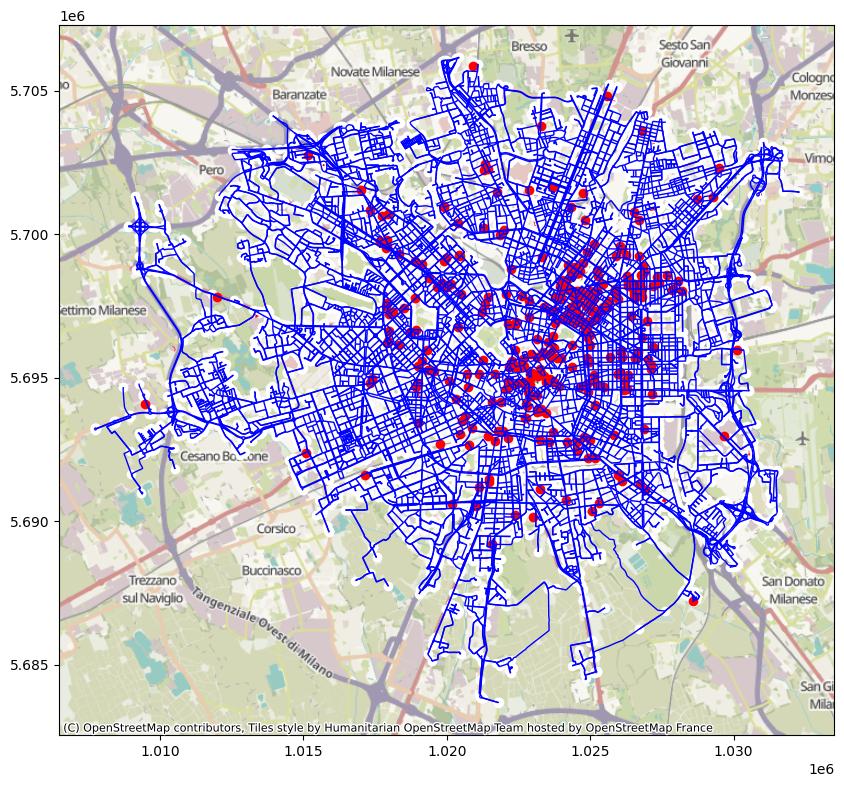

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,10))
area2.plot(ax=ax,facecolor='white')
edges2.plot(ax=ax,edgecolor='blue',linewidth=1)
cinemas2.plot(ax=ax,color='red')
cx.add_basemap(ax=ax,crs=cinemas2.crs.to_string())

In [ ]:
workships2.religion.unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['jewish', 'christian', 'buddhist', 'muslim', 'shinto', nan,
       'scientologist'], dtype=object)

In [ ]:
workships_jewish = workships2[workships2.religion=='jewish']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


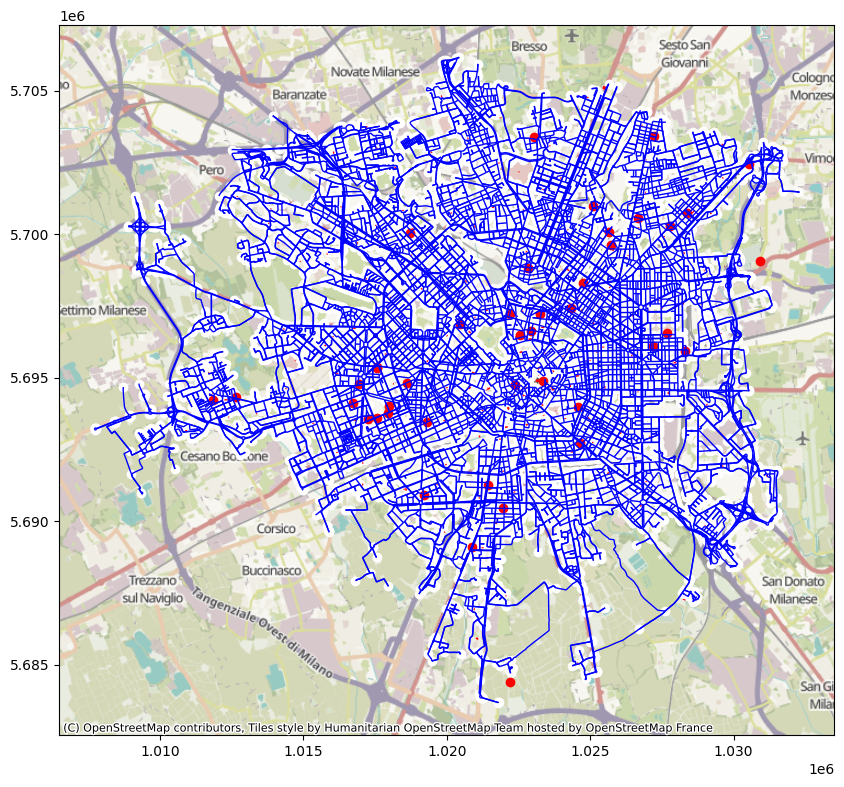

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
area2.plot(ax=ax,facecolor='white')
edges2.plot(ax=ax,edgecolor='blue',linewidth=1)
workships2.plot(ax=ax,color='red')
cx.add_basemap(ax=ax,crs=workships2.crs.to_string())

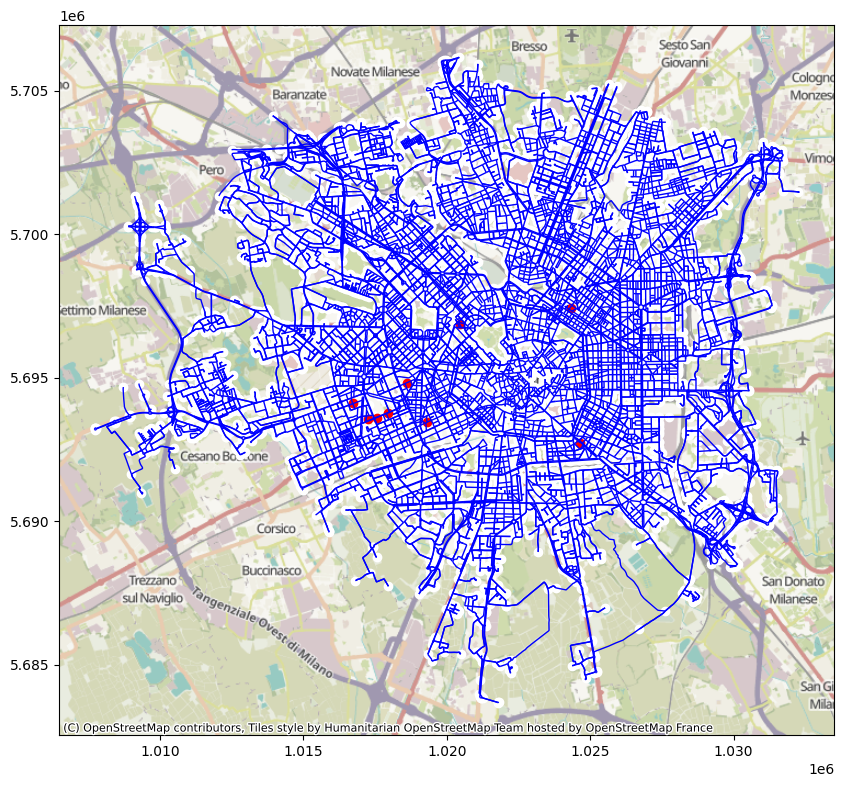

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
area2.plot(ax=ax,facecolor='white')
edges2.plot(ax=ax,edgecolor='blue',linewidth=1)
workships_jewish.plot(ax=ax,color='red')
cx.add_basemap(ax=ax,crs=workships_jewish.crs.to_string())

In [ ]:
origin = ox.geocode_to_gdf('')

In [ ]:
destination = ox.geocode_to_gdf('')